In [25]:
### ATOC7500 Lecture #5 - multiple_linear_regression_grades
### coded by Prof. Jennifer Kay (University of Colorado)
### last updated September 16, 2020

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import xarray
import pandas as pd   ##pandas reads in .csv.
from scipy import stats
import seaborn as sns  ### seaborn just makes things pretty -- no new typing
sns.set_style('whitegrid')  ###  change away from grey grid (seaborn default) to white grid
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn import metrics

In [26]:
filename = 'class_grades_detailed_anonymous.csv'
data=pd.read_csv(filename,sep=',')
#print(data)

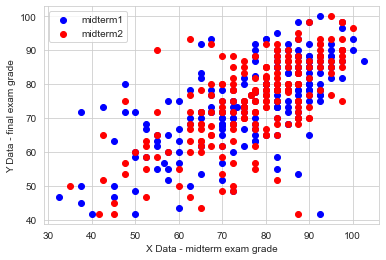

In [27]:
### Assign X and Y data
x1data=data['midterm1']
x2data=data['midterm2']
ydata=data['final']
N=len(ydata)
plt.scatter(x1data,ydata,color='blue',label='midterm1');
plt.scatter(x2data,ydata,color='red',label='midterm2');
plt.xlabel('X Data - midterm exam grade');
plt.ylabel('Y Data - final exam grade');
plt.legend();

In [28]:
### Calculate the correlation statistics
slope, intercept, r_value_x1y, p_value, std_err = stats.linregress(x1data,ydata)
print('r_value_x1y: ',round(r_value_x1y,2))
print('r2_value_x1y: ',round(r_value_x1y*r_value_x1y,2))
slope, intercept, r_value_x2y, p_value, std_err = stats.linregress(x2data,ydata)
print('r_value_x2y: ',round(r_value_x2y,2))
print('r2_value_x2y: ',round(r_value_x2y*r_value_x2y,2))
### Calculate the correlation coefficient between X1 and X2
slope, intercept, r_value_x2x1, p_value, std_err = stats.linregress(x2data,x1data)
print('r_value_x2x1: ',round(r_value_x2x1,2))

r_value_x1y:  0.66
r2_value_x1y:  0.44
r_value_x2y:  0.66
r2_value_x2y:  0.44
r_value_x2x1:  0.61


In [29]:
### Does adding midterm2 improve your ability to predict the final exam grade?
### Calculate the minimum useful correlation and compare it.
r_min=r_value_x1y*r_value_x2x1
print('minimum r needed to be useful(r_min)',round(r_min,2))
print('r_value_x2y: ',round(r_value_x2y,2))
print('Since r_value_x2y exceeds r_min -- adding midterm2 is useful')

minimum r needed to be useful(r_min) 0.41
r_value_x2y:  0.66
Since r_value_x2y exceeds r_min -- adding midterm2 is useful


In [30]:
### Ok Let's do multiple linear regression.
### We'll use both midterm1 and midterm2 to predict the final exam grade.

#---------------------------------------------
# both x1 and x2 predictors
X = np.swapaxes([x1data,x2data],1,0)
Y = np.swapaxes([ydata],1,0)

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)
R2_x12 = metrics.r2_score(Y,regr.predict(X))

print('Variance explained (R2) is larger with two predictors than with one: \
'+str(round(R2_x12,2))+' > '+str(round(r_value_x2y*r_value_x2y,2)))

Variance explained (R2) is larger with two predictors than with one: 0.55 > 0.44


In [18]:
### note: this code not working in my python distribution... ignore it.  i'll fix it another time.

#x = np.column_stack((x1data,x2data))
#x = sm.add_constant(x, prepend=True)
#results = smf.OLS(ydata,x).fit()
#print(results.summary())
#print('Variance Explained:',results.rsquared)

#a0=results.params.const
#a1=results.params.x1
#a2=results.params.x2
#r2=results.rsquared
#y_pred=a0+a1*x1data+a2*x2data
#plt.scatter(ydata,y_pred,color='blue')
#plt.xlabel('Y Data - final exam grade')
#plt.ylabel('Y Predict - final exam grade')
#plt.title('Y_pred=a0+a1*x1+a2*x2 with variance explained r2='+str(round(r2,2)))
#print('Variance explained (R2) is larger with two predictors than with one: '+str(round(r2,2))+' > '+str(round(r_value_x2y*r_value_x2y,2)))